In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf
import PIL

import numpy as np
import cv2

img=plt.imread('happy/IMG20240302175036.jpg')

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir="data"

datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255,rotation_range=40,
                        zoom_range=0,
                           width_shift_range=0.25,
                           height_shift_range=0.25,
                           shear_range=0.25,
                           horizontal_flip=True,
                           fill_mode="nearest")

train_data=datagen.flow_from_directory(data_dir,classes=['happy','sad'],subset='training',target_size=(224,224))
test_data=datagen.flow_from_directory(data_dir,classes=['happy','sad'],subset='validation',target_size=(224,224))

mo=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

for i in mo.layers[:-4]:
    i.trainable=False

from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
model=Sequential([mo,
                 Flatten(),
                 Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
                 Dropout(0.2),
                 Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
                 Dropout(0.01),
                 Dense(2,activation='sigmoid')])

model.summary()

from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_data,validation_data=test_data,epochs=30)


    

1/1 [==============================] - 0s 89ms/step
Prediction: Sad


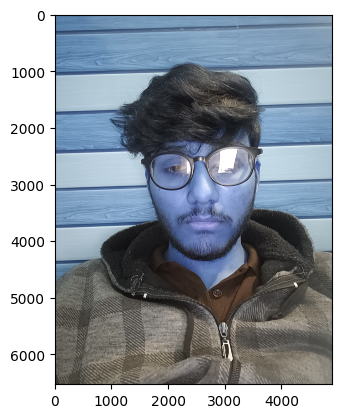

In [35]:
def predict(img_path):
    img = plt.imread(img_path)
    
    img = cv2.resize(img, (224, 224))  # Resize the image to match the input shape of the model
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Preprocess the image
    img = img / 255.0  # Normalize pixel values to [0, 1]

    # Make prediction
    prediction = model.predict(img)
    
    # Decode prediction
    if prediction[0][0] > 0.5:
        result = "Happy"
    else:
        result = "Sad"
    
    return result

# Example usage
img_path = 'data/sad/IMG20240302175137.jpg'
a=cv2.imread(img_path)
plt.imshow(a)
prediction = predict(img_path)
print("Prediction:", prediction)
